In [1]:
#!/usr/bin/env python
# coding: utf-8

# Importing libraries

In[ ]:

In [2]:
import tensorflow
import keras

In [3]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils.data_utils import pad_sequences

In [6]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Embedding, Bidirectional

In [7]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Modelling

In [8]:
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [9]:
sns.set(font_scale=1.3)
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In[ ]:

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In[ ]:<br>
Read datasets

In [11]:
df_train = pd.read_csv('/content/drive/MyDrive/Sentiment_Dataset/multiclass_kaggle/train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('/content/drive/MyDrive/Sentiment_Dataset/multiclass_kaggle/val.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('/content/drive/MyDrive/Sentiment_Dataset/multiclass_kaggle/test.txt', names=['Text', 'Emotion'], sep=';')

In[ ]:

rint first 5 rows

In [12]:
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In[ ]:

rint the shape of the data set

In [13]:
print(df_train.shape)

(16000, 2)


In[ ]:

rint first 5 rows

In [14]:
df_test.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In[ ]:

rint the shape of the data set

In [ ]:
print(df_test.shape)

(2000, 2)


In[ ]:

rint first 5 rows

In [15]:
df_val.head()

,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In[ ]:

rint the shape of the data set

In [ ]:
print(df_val.shape)

(2000, 2)


# Assessing

## Train dataset

In[ ]:

heck if the data is balanced or not

In [ ]:
df_train.Emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In[ ]:

heck if the data is balanced or not

In [16]:
df_train.Emotion.value_counts() / df_train.shape[0] *100

joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: Emotion, dtype: float64

In[ ]:

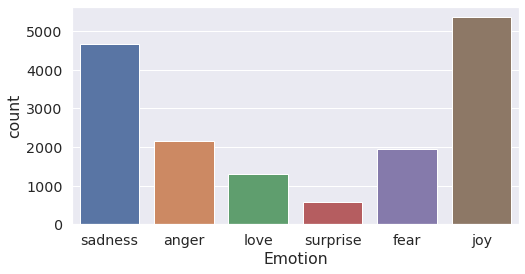

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_train);

The data is imbalanced so, we may try to balance it but also, the emotions that we interested in are the most repeated emotion so, till now we can keep the data as it is

In[ ]:

rint the number of null values in each column

In [17]:
df_train.isnull().sum()

Text       0
Emotion    0
dtype: int64

The data doesn't contains any null values

In[ ]:

rint the number of duplicated values 

In [18]:
df_train.duplicated().sum()

1

There is just one row which is duplicated but we need to check also if there are rows having the same text but different emotions

In[ ]:

emoving duplicated values

In [19]:
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In[ ]:

rint the rows which are duplicated (duplicated in the text but with different emotions)

In [20]:
df_train[df_train['Text'].duplicated() == True]

,Text,Emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In[ ]:

rint some of those rows to check

In [21]:
df_train[df_train['Text'] == df_train.iloc[7623]['Text']]

,Text,Emotion
1625,i was intensely conscious of how much cash i h...,anger
7623,i was intensely conscious of how much cash i h...,sadness


In[ ]:

In [22]:
df_train[df_train['Text'] == df_train.iloc[14313]['Text']]

,Text,Emotion
13653,i could feel myself hit this strange foggy wall,fear
14313,i could feel myself hit this strange foggy wall,surprise


In[ ]:

In [ ]:
df_train[df_train['Text'] == df_train.iloc[13879]['Text']]

,Text,Emotion
7333,i feel like i am very passionate about youtube...,joy
13879,i feel like i am very passionate about youtube...,love


In[ ]:

emoving duplicated text 

In [23]:
index = df_train[df_train['Text'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In[ ]:

ount the number of stopwords in the data

In [24]:
temp =df_train.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: stop_words, dtype: int64

The data contains alot of stopwords (some rows contains more than 25 stopword!) so, we need to take care when we remove them as some rows may become empty 

In[ ]:

istribution of stopwords visually

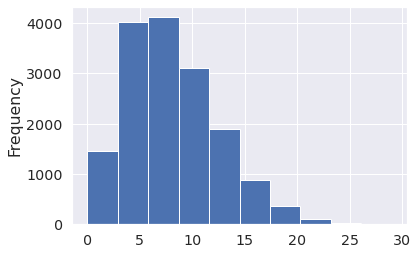

In [25]:
temp['stop_words'].plot(kind= 'hist')

## Test dataset

In[ ]:

heck if the data is balanced or not

In [102]:
df_test.Emotion.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Emotion, dtype: int64

In[ ]:

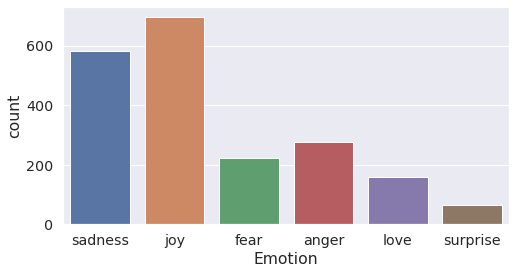

In [103]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_test);

In[ ]:

rint the number of null values in each column

In [104]:
df_test.isnull().sum()

Text       0
Emotion    0
dtype: int64

In[ ]:

rint the number of duplicated values 

In [105]:
df_test.duplicated().sum()

1

In[ ]:

rint the rows which are duplicated

In [106]:
df_test[df_test['Text'].duplicated() == True]

,Text,Emotion
1587,feel ashamed,sadness


In[ ]:

ount the number of stopwords in the data

In [107]:
temp =df_test.copy()
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

0    1986
1      14
Name: stop_words, dtype: int64

In[ ]:

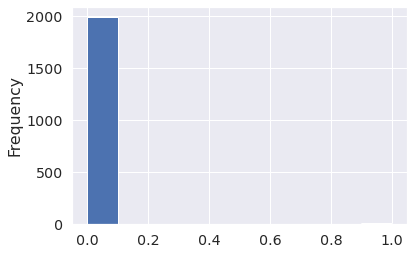

In [108]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind= 'hist')

## Validation dataset

In[ ]:

heck if the data is balanced or not

In [109]:
df_val.Emotion.value_counts()

joy         703
sadness     550
anger       274
fear        212
love        178
surprise     81
Name: Emotion, dtype: int64

In[ ]:

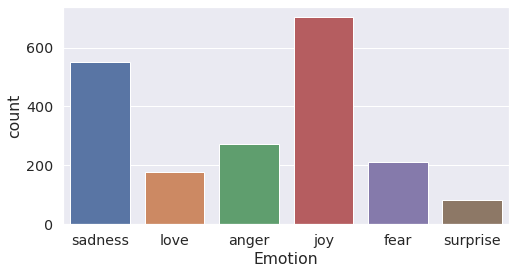

In [110]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_val);

In[ ]:

rint the number of null values in each column

In [111]:
df_val.isnull().sum()

Text       0
Emotion    0
dtype: int64

In[ ]:

rint the number of duplicated values 

In [112]:
df_val.duplicated().sum()

0

In[ ]:

rint the rows which are duplicated

In [113]:
df_val[df_val['Text'].duplicated() == True]

,Text,Emotion
773,feel tortured,fear


In[ ]:

In [114]:
df_val[df_val['Text'] == df_val.iloc[603]['Text']]

,Text,Emotion
603,like use h word recklessly would admit feeling...,joy


In[ ]:

In [115]:
df_val[df_val['Text'] == df_val.iloc[1993]['Text']]

,Text,Emotion
1993,im ssa examination tomorrow morning im quite w...,sadness


In[ ]:

emoving duplicated text

In [116]:
index = df_val[df_val['Text'].duplicated() == True].index
df_val.drop(index, axis = 0, inplace = True)
df_val.reset_index(inplace=True, drop = True)

In[ ]:

ount the number of stopwords in the data

In [117]:
temp =df_val.copy()
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()[:10]

0    1983
1      14
Name: stop_words, dtype: int64

In[ ]:

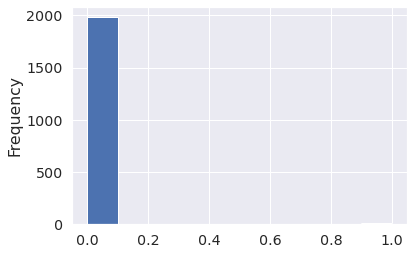

In [118]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind= 'hist');

## Compare rows of the datasets

check that there is no data leakage

In[ ]:

In [119]:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""
    
    # Combine the two DataFrames using a merge operation, with the
    # indicator parameter set to True. This adds a column called _merge
    # to the resulting DataFrame, which indicates the source of each row.
    comparison_df = df1.merge(
        df2,
        indicator=True,
        how='outer'
    )
    
    # Filter the merged DataFrame based on the value of _merge. If which
    # is not specified, return all rows where _merge is not 'both'.
    # Otherwise, return all rows where _merge has the specified value
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
        
    # Return the filtered DataFrame
    return diff_df

In[ ]:

In [120]:
dataframe_difference(df_train, df_test, which='both')

,Text,Emotion,_merge
971,feel tender,love,both
1345,feel embarrassed,sadness,both
1624,feel better,joy,both
2091,feel accepted,love,both
2092,feel accepted,love,both
3279,feel troubled,sadness,both
3280,feel troubled,sadness,both
3556,feeling happy,joy,both
5058,feel alarmed,fear,both
5432,feel glad,joy,both


In[ ]:

In [121]:
dataframe_difference(df_train, df_val, which='both')

,Text,Emotion,_merge
11,feel romantic,love,both
373,feel complimented insulted,anger,both
1743,feel useful,joy,both
1744,feel useful,joy,both
3122,im feeling relaxed,joy,both
3279,feel troubled,sadness,both
3280,feel troubled,sadness,both
3423,feel respected,joy,both
3571,feel reassured,joy,both
3900,feel really listless right,sadness,both


In[ ]:

In [122]:
dataframe_difference(df_val, df_test, which='both')

,Text,Emotion,_merge
531,feel troubled,sadness,both
685,feel overwhelmed,surprise,both


## Cleaning

In[ ]:

In [123]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()
    text = text.split()
    text=[lemmatizer.lemmatize(y) for y in text]
    
    return " " .join(text)

In [124]:
def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

In [125]:
def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

In [126]:
def lower_case(text):
    
    text = text.split()
    text=[y.lower() for y in text]
    
    return " " .join(text)

In [127]:
def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

In [128]:
def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [129]:
def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(text))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

In [130]:
def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence
    

In [131]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In[ ]:

In [57]:
normalized_sentence("My Name is Mohamed. @Tweets,  plays 2022  Egypt_")

'name mohamed tweet play egypt'

In[ ]:

In [58]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)

plitting the text from the labels

In [59]:
X_train = df_train['Text']
y_train = df_train['Emotion']

In [60]:
X_test = df_test['Text']
y_test = df_test['Emotion']

In [61]:
X_val = df_val['Text']
y_val = df_val['Emotion']

In[ ]:

Encode labels

In [62]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In[ ]:

In [63]:
print(set(y_train))

{0, 1, 2, 3, 4, 5}


In[ ]:

onvert the class vector (integers) to binary class matrix

In [64]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In[ ]:

In [65]:
print(y_train)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


## Tokenizing

In[ ]:

Tokenize words

In [66]:
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(np.concatenate([X_train, X_test], axis=0))

In[ ]:

ord index: A dictionary of words and their uniquely assigned integers.<br>
okenizer.word_index

In[ ]:

ord counts: A dictionary of words and their counts.<br>
okenizer.word_counts

In[ ]:

ocument count: A dictionary of words and how many documents each appeared in.<br>
n this dataset the output will be the number of rows

In [67]:
tokenizer.document_count

17969

In[ ]:

ord docs: An integer count of the total number of documents(or rows) that were used to fit the Tokenizer.<br>
okenizer.word_docs

In[ ]:

rint the index of a single word

In [68]:
tokenizer.word_index['towards']

220

In[ ]:

onverting a single sentence to list of indexes

In [69]:
tokenizer.texts_to_sequences(X_train[0].split())

[[53], [2], [531]]

In[ ]:

onvert the list of indexes into a matrix of ones and zeros (BOW)

In [70]:
tokenizer.texts_to_matrix(X_train[0].split())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In[ ]:

he sentence contains three words and the size of the vocabulary is 14325

In [71]:
tokenizer.texts_to_matrix(X_train[0].split()).shape

(3, 14325)

In[ ]:

In [72]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In[ ]:

rint the sentence after converting them to indexes<br>
equences_train

## Padding<br>
<br>
The vectors we obtain are generally not of equal lengths<br>
<br>
For that, we might need to pad the sequences to max len. 

In[ ]:

In [73]:
df_test.shape

(2000, 2)

In[ ]:

In [74]:
maxlen = max([len(t) for t in df_train['Text']])
maxlen

229

In[ ]:

In [75]:
X_train = pad_sequences(sequences_train, maxlen=229, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=229, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=229, truncating='pre')

In [76]:
vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 14325


In[ ]:

efore

In [77]:
sequences_train[0]

[53, 2, 531]

In[ ]:

fter

In [78]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Word Embedding

**This code defines the following variables:**<br>
<br>
**path_to_glove_file**: The file path to the GloVe word vectors file.<br>
<br>
**num_tokens**: The size of the vocabulary. This is typically the number of unique words in the dataset.<br>
<br>
**embedding_dim**: The dimensionality of the word vectors. This is usually set to a fixed value (e.g., 200, 300, etc.) depending on the size of the word vectors file that is being used.<br>
<br>
**hits**: A counter for the number of words that are found in the embeddings_index dictionary.<br>
<br>
**misses**: A counter for the number of words that are not found in the embeddings_index dictionary.<br>
<br>
**embeddings_index**: A dictionary that will store the word vectors, with the words as keys and the word vectors as values.

In[ ]:

Read GloVE embeddings

In [79]:
path_to_glove_file = '/content/drive/MyDrive/Sentiment_Dataset/input_glove/glove.6B.200d.txt'
num_tokens = vocabSize
embedding_dim = 200 #latent factors or features  
hits = 0
misses = 0
embeddings_index = {}

I will intialize an embedding matrix with all zero values and then looping through the vocabulary (as defined by the tokenizer object) to assign word vectors to the corresponding rows of the embedding matrix. The word_index attribute of the tokenizer object is a dictionary that maps words to their indices in the vocabulary.<br>
<br>
The embedding matrix will have a size of num_tokens rows and embedding_dim columns, where num_tokens is the size of the vocabulary and embedding_dim is the dimensionality of the word vectors.<br>
<br>
For each word in the vocabulary, the code looks up the corresponding word vector in the embeddings_index dictionary and assigns it to the corresponding row of the embedding matrix. If the word is not found in the embeddings_index dictionary (i.e., if embedding_vector is None), the code increments the misses counter and the row of the embedding matrix remains all-zeros. If the word is found in the embeddings_index dictionary, the code increments the hits counter and assigns the word vector to the corresponding row of the embedding matrix. Finally, the code prints out the number of words that were converted (hits) and the number that were not found in the embeddings_index dictionary (misses).

In[ ]:

Read word vectors

In [80]:
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

Found 265985 word vectors.


Assign word vectors to our dictionary/vocabulary

In [81]:
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 13048 words (1276 misses)


## Modeling

**The model consists of several layers:**<br>
<br>
1. An Embedding layer that takes in integer-encoded text and looks up the embedding vector for each word in the input. The input length is set to the length of the input sequences, and the weights are initialized with an embedding matrix that has been pre-trained on a large dataset. The embedding layer is not trainable, meaning that the weights of this layer will not be updated during training.<br>
<br>
2. Three Bidirectional layers, each of which applies a forward and backward LSTM to the input. LSTMs are a type of recurrent neural network that are able to capture long-term dependencies in sequential data. The dropout and recurrent dropout arguments specify the dropout rate to apply to the inputs and recurrent inputs of the LSTMs, respectively. The return_sequences argument specifies whether the LSTM should return the full sequences of outputs or just the last output of each sequence.<br>
<br>
3. A Dense layer that applies a linear transformation to the input to produce the output. The output has 6 units and uses the 'softmax' activation function, which means that it will output a probability distribution over the 6 classes.

In[ ]:

Build neural network architecture

In [82]:
adam = Adam(learning_rate=0.005)

In [83]:
model = Sequential()
model.add(Embedding(vocabSize, embedding_dim, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
#model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(32, dropout=0.2,recurrent_dropout=0.2)))
#model.add(Bidirectional(LSTM(12, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

In [84]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 229, 200)          2865000   
                                                                 
 bidirectional (Bidirectiona  (None, 229, 256)         336896    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 229, 128)         164352    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                        

**This is the summary of a deep learning model built using the Keras functional API. The model consists of several layers, each of which has a specific type and number of parameters.**<br>
<br>
1. The first layer is an "Embedding" layer, which takes in integer-encoded text and looks up the embedding vector for each word in the input. The output of this layer is a 3D tensor with shape (batch_size, sequence_length, embedding_dim), where batch_size is the number of examples in the batch, sequence_length is the length of the input sequences, and embedding_dim is the size of the embedding vectors. In this case, the input sequences are 229 words long and the embedding vectors are 200 dimensions. The embedding layer has a total of 2,863,600 trainable parameters.<br>
<br>
2. The next three layers are "Bidirectional" layers, which apply a forward and backward LSTM to the input. LSTMs are a type of recurrent neural network that are able to capture long-term dependencies in sequential data. The output of each bidirectional layer is a 3D tensor with shape (batch_size, sequence_length, units), where units is the number of LSTM units in the layer. In this case, the first bidirectional layer has 512 units, the second has 256 units, and the third has 256 units. Each of these layers has a large number of trainable parameters, as LSTMs are complex models with many internal weights.<br>
<br>
3. The final layer is a "Dense" layer, which applies a linear transformation to the input to produce the output. In this case, the output has shape (batch_size, 6), indicating that there are 6 classes. The dense layer has a total of 1,542 trainable parameters.<br>
<br>
Overall, the model has a total of 4,851,702 trainable parameters and 2,863,600 non-trainable parameters.

In[ ]:

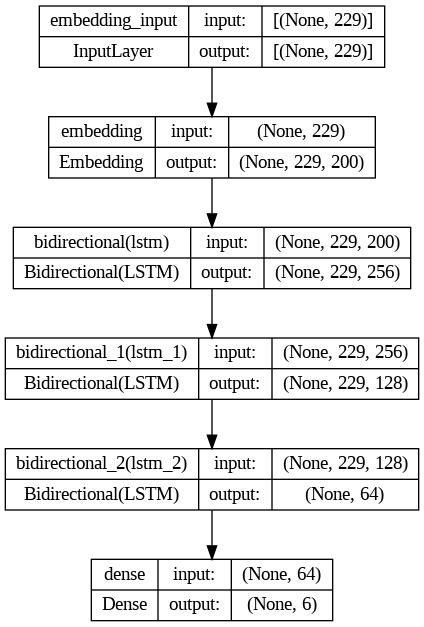

In [85]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In[ ]:

o stop the training when the loss starts to increase

In [86]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In[ ]:

Fit model

In [87]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=5,
                    callbacks=[callback]
                   )

Epoch 1/5
63/63 [==============================] - 1033s 16s/step - loss: 1.1569 - accuracy: 0.5714 - val_loss: 0.6866 - val_accuracy: 0.7623
Epoch 2/5
63/63 [==============================] - 964s 15s/step - loss: 0.4794 - accuracy: 0.8327 - val_loss: 0.3181 - val_accuracy: 0.8879
Epoch 3/5
63/63 [==============================] - 951s 15s/step - loss: 0.2616 - accuracy: 0.9014 - val_loss: 0.2000 - val_accuracy: 0.9149
Epoch 4/5
63/63 [==============================] - 952s 15s/step - loss: 0.1702 - accuracy: 0.9284 - val_loss: 0.1806 - val_accuracy: 0.9214
Epoch 5/5
63/63 [==============================] - 981s 16s/step - loss: 0.1320 - accuracy: 0.9373 - val_loss: 0.1557 - val_accuracy: 0.9244


In[ ]:

rint the overall loss and accuracy

In [132]:
model.evaluate(X_val, y_val, verbose=1) 

63/63 [==============================] - 29s 461ms/step - loss: 0.1557 - accuracy: 0.9244


[0.1556595116853714, 0.924424409866333]

In[ ]:

rint the overall loss and accuracy

In [133]:
model.evaluate(X_test, y_test, verbose=1) 

63/63 [==============================] - 33s 522ms/step - loss: 0.1599 - accuracy: 0.9265


[0.1598779857158661, 0.9265000224113464]

In[ ]:

In [134]:
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

63/63 [==============================] - 29s 468ms/step


In [135]:
print(classification_report(le.transform(df_test['Emotion']), y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       275
           1       0.88      0.92      0.90       224
           2       0.95      0.94      0.94       695
           3       0.83      0.81      0.82       159
           4       0.95      0.97      0.96       581
           5       0.82      0.68      0.74        66

    accuracy                           0.93      2000
   macro avg       0.89      0.87      0.88      2000
weighted avg       0.93      0.93      0.93      2000



In[ ]:

Visualize Loss & Accuracy

In [136]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [137]:
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

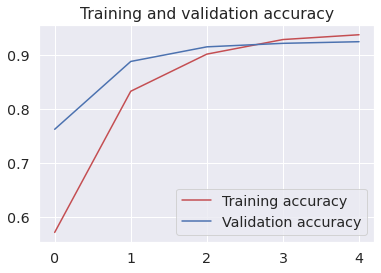

<Figure size 432x288 with 0 Axes>

In [138]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

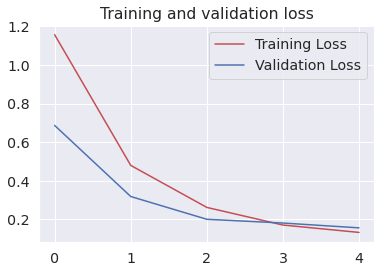

In [139]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [140]:
df_ytb = pd.read_csv("/content/drive/MyDrive/Sentiment_Dataset/ytb_comments_family.csv")
df_ytb.head()

# Remove column name 'Unnamed: 0'
dfc = df_ytb.drop(['Unnamed: 0'], axis=1)
dfc.head()


def clean_html(text):
    clean=re.compile('<.*?>')
    cleantext=re.sub(clean,'',text)
    return cleantext
    
# first round of cleaning
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

# second round of cleaning
def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text
    
cleaned_html=lambda x:clean_html(x)
cleaned1=lambda x:clean_text1(x)
cleaned2=lambda x:clean_text2(x)

dfc['review'] = dfc['comment']
#dfc['review']=pd.DataFrame(dfc.review.apply(cleaned_html))
#dfc['review']=pd.DataFrame(dfc.review.apply(cleaned1))
#dfc['review']=pd.DataFrame(dfc.review.apply(cleaned2))

#from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()
words = stopwords.words("english")

#dfc['processedtext'] = dfc['review'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

print(dfc.shape)
dfc.head(10)

first10comments = dfc.review.values

sentences = first10comments[1:30]


(92, 3)


In [141]:
print(sentences)

['I utterly adore this profoundly beautiful and deeply meaningful film.'
 'God knows that we all get discouraged...especially with everything going on today and if it&#39;s hard for us to see...imagine how he feels...but he hears every prayer we say...especially the ones were we beg for his help...just like Jimmy did in the movie.'
 'Master class in acting'
 'The female singer of the Italian song Vieni Vieni playing in the background is none other than Adriana Caselotti, the original voice of Disney&#39;s Snow White. You may recognize her whistling too as she was the distinctive whistling artist of Whistle While You Work also!'
 'James Stewart gives one of the greatest performances in cinematic history in this film. There isn’t one moment that doesn’t feel completely genuine and natural. You have to have some internal goodness inside of you to play a character like George Bailey so well, a piece of that character woven into your true personality. And by all accounts, Mr. Stewart did. A

**So, you may asking when I give a sentence to the model how the classification will done?**<br>
<br>
1. First, the model will convert the words in the sentence into numerical representations, also known as word embeddings. These word embeddings capture the meaning of the words and their relationships to each other in a continuous vector space.<br>
<br>
2. The word embeddings for each word in the sentence are then input to two separate LSTM models: one that processes the sequence forwards and one that processes it backwards. At each time step, each LSTM processes the current word embedding and the previous hidden state to produce a new hidden state. The hidden state at each time step is a combination of the previous hidden state and the current input, and it captures the information from all the previous time steps in the sequence.<br>
<br>
3. After processing all the words in the sentence, the two LSTMs will have final hidden states that encode the meaning of the sentence from both the forwards and backwards directions. These final hidden states are then combined and used to make a prediction.

In[ ]:

Classify custom sample

In [142]:
#sentences = ["He's over the moon about being accepted to the university",
#"Your point on this certain matter made me outrageous, how can you say so? This is insane.",
#"I can't do it, I'm not ready to lose anything, just leave me alone",
#"Merlin's beard harry, you can cast the Patronus charm! I'm amazed!"]

for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

I utterly adore this profoundly beautiful and deeply meaningful film.
1/1 [==============================] - 0s 210ms/step
joy : 0.9470276236534119


God knows that we all get discouraged...especially with everything going on today and if it&#39;s hard for us to see...imagine how he feels...but he hears every prayer we say...especially the ones were we beg for his help...just like Jimmy did in the movie.
1/1 [==============================] - 0s 220ms/step
joy : 0.5410124659538269


Master class in acting
1/1 [==============================] - 0s 228ms/step
joy : 0.6926204562187195


The female singer of the Italian song Vieni Vieni playing in the background is none other than Adriana Caselotti, the original voice of Disney&#39;s Snow White. You may recognize her whistling too as she was the distinctive whistling artist of Whistle While You Work also!
1/1 [==============================] - 0s 230ms/step
joy : 0.2927570343017578


James Stewart gives one of the greatest performances in 

In[ ]:

In [99]:
sentence= 'my old brother is dead'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
proba =  np.max(model.predict(sentence))
print(f"{result} : {proba}\n\n")

my old brother is dead
1/1 [==============================] - 0s 219ms/step
anger : 0.38721269369125366




In[ ]:

In [100]:
sentence= 'Im feeling sad today'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
proba =  np.max(model.predict(sentence))
print(f"{result} : {proba}\n\n")

Im feeling sad today
1/1 [==============================] - 0s 206ms/step
sadness : 0.9986129999160767




In[ ]:

In [143]:
model.save('Kaggle_MultiClass.h5')

In [144]:
!cp /content/Kaggle_MultiClass.h5 /content/drive/MyDrive/Sentiment_Dataset/Saved_Model

In [145]:
transferredModel = keras.models.load_model("/content/drive/MyDrive/Sentiment_Dataset/Saved_Model/Kaggle_MultiClass.h5")

In [146]:
sentence= 'my old brother is dead'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
proba =  np.max(transferredModel.predict(sentence))
print(f"{result} : {proba}\n\n")

my old brother is dead
1/1 [==============================] - 2s 2s/step
anger : 0.38721269369125366


